# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)



Epoch 1/50
62/62 [==============================] - 10s 59ms/step - loss: 0.0102
Epoch 2/50
62/62 [==============================] - 4s 67ms/step - loss: 0.0032
Epoch 3/50
62/62 [==============================] - 4s 60ms/step - loss: 0.0023
Epoch 4/50
62/62 [==============================] - 4s 62ms/step - loss: 0.0024
Epoch 5/50
62/62 [==============================] - 4s 57ms/step - loss: 0.0024
Epoch 6/50
62/62 [==============================] - 4s 57ms/step - loss: 0.0022
Epoch 7/50
62/62 [==============================] - 4s 60ms/step - loss: 0.0022
Epoch 8/50
62/62 [==============================] - 4s 72ms/step - loss: 0.0021
Epoch 9/50
62/62 [==============================] - 4s 66ms/step - loss: 0.0018
Epoch 10/50
62/62 [==============================] - 4s 58ms/step - loss: 0.0019
Epoch 11/50
62/62 [==============================] - 4s 57ms/step - loss: 0.0018
Epoch 12/50
62/62 [==============================] - 5s 73ms/step - loss: 0.0020
Epoch 13/50
62/62 [=================

In [26]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [28]:
#Compile the model
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 11s 58ms/step - loss: 0.0010
Epoch 2/50
62/62 [==============================] - 4s 57ms/step - loss: 8.6853e-04
Epoch 3/50
62/62 [==============================] - 4s 67ms/step - loss: 8.7959e-04
Epoch 4/50
62/62 [==============================] - 3s 54ms/step - loss: 8.9678e-04
Epoch 5/50
62/62 [==============================] - 3s 54ms/step - loss: 8.2711e-04
Epoch 6/50
62/62 [==============================] - 3s 54ms/step - loss: 9.1052e-04
Epoch 7/50
62/62 [==============================] - 4s 57ms/step - loss: 9.0011e-04
Epoch 8/50
62/62 [==============================] - 4s 66ms/step - loss: 8.8283e-04
Epoch 9/50
62/62 [==============================] - 3s 54ms/step - loss: 7.9527e-04
Epoch 10/50
62/62 [==============================] - 3s 54ms/step - loss: 7.4039e-04
Epoch 11/50
62/62 [==============================] - 4s 63ms/step - loss: 7.4640e-04
Epoch 12/50
62/62 [==============================] - 4s 68ms/step - loss: 7.4

In [13]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


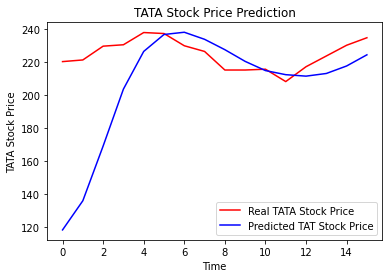

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()